<a href="https://colab.research.google.com/github/Ankabellam/ChatDev/blob/main/Miniproject_Question(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
    1. Date
    2. Quarter (Four Quarters)
    3. Department (Sewing and Finishing)
    4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
    5. Team
    6. Targeted_Producitivity (Target which needs to be achieved)
    7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
    8. WIP (Work in progress)
    9. Over_time
    10. Incentive
    11. Idle_time
    12. Idle_men (Idle workers)
    13. no_of_style_change
    14. no_of_workers
    15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

# New section

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [5]:
import pandas as pd

# Assuming the data is in a DataFrame called 'df'
# Replace 'data.csv' with the actual filename if needed
df = pd.read_csv('garments_worker_productivity.csv')

# Get basic summary statistics for numerical variables
summary_stats = df.describe()

print(summary_stats)


              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

In [6]:
# Count the number of working days
num_working_days = df['date'].nunique()
print("Number of working days:", num_working_days)

# Count the number of quarters in the year
num_quarters = df['quarter'].nunique()
print("Number of quarters:", num_quarters)


Number of working days: 59
Number of quarters: 5


              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


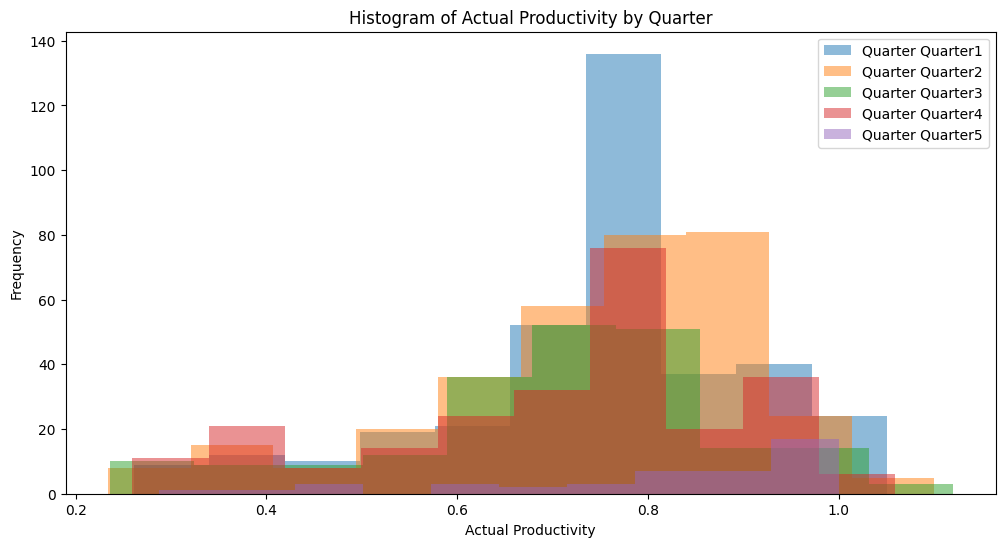

In [7]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation of actual productivity for each quarter
quarter_stats = df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print(quarter_stats)

# Plot histograms of actual productivity for each quarter
plt.figure(figsize=(12, 6))
for quarter in df['quarter'].unique():
  plt.hist(df[df['quarter'] == quarter]['actual_productivity'], alpha=0.5, label=f'Quarter {quarter}')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity by Quarter')
plt.legend()
plt.show()

# Conclusion: (Write your conclusion based on the histogram analysis here)
# For example: It appears that Quarter 2 has the highest average actual productivity,
# while Quarter 1 has the lowest. There is also more variability in productivity in Quarter 1.


In [8]:
# Count the number of instances for each department
department_counts = df['department'].value_counts()
print(department_counts)


department
sewing       691
finishing    506
Name: count, dtype: int64


                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


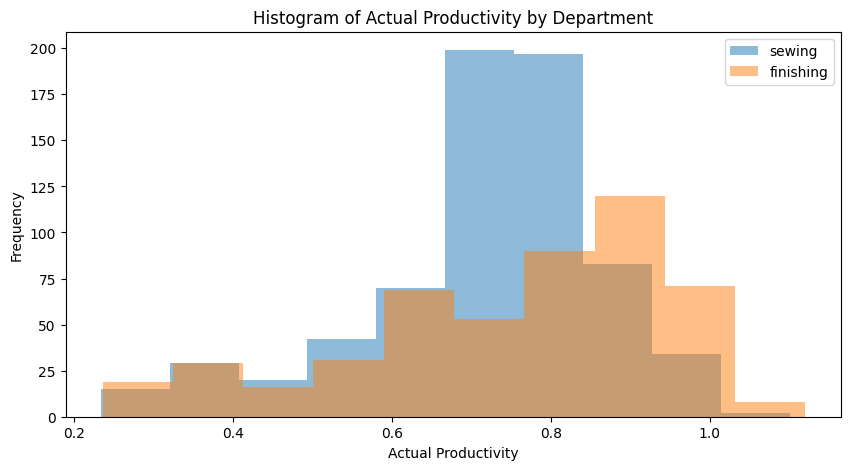

In [9]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation of actual productivity for each department
department_stats = df.groupby('department')['actual_productivity'].agg(['mean', 'std'])
print(department_stats)

# Plot histograms of actual productivity for each department
plt.figure(figsize=(10, 5))
for department in df['department'].unique():
  plt.hist(df[df['department'] == department]['actual_productivity'], alpha=0.5, label=department)
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity by Department')
plt.legend()
plt.show()

# Conclusion: (Write your conclusion based on the histogram analysis here)
# For example: It seems that the finishing department has a slightly higher average actual productivity
# compared to the sewing department. The spread of productivity values also appears to be similar
# between the two departments.


In [11]:
# Count the number of instances for each team
team_counts = df['team'].value_counts()
print("Team Counts:\n", team_counts)

# Count the number of instances for each smv
smv_counts = df['smv'].value_counts()
print("\nSMV Counts:\n", smv_counts)


Team Counts:
 team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

SMV Counts:
 smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64


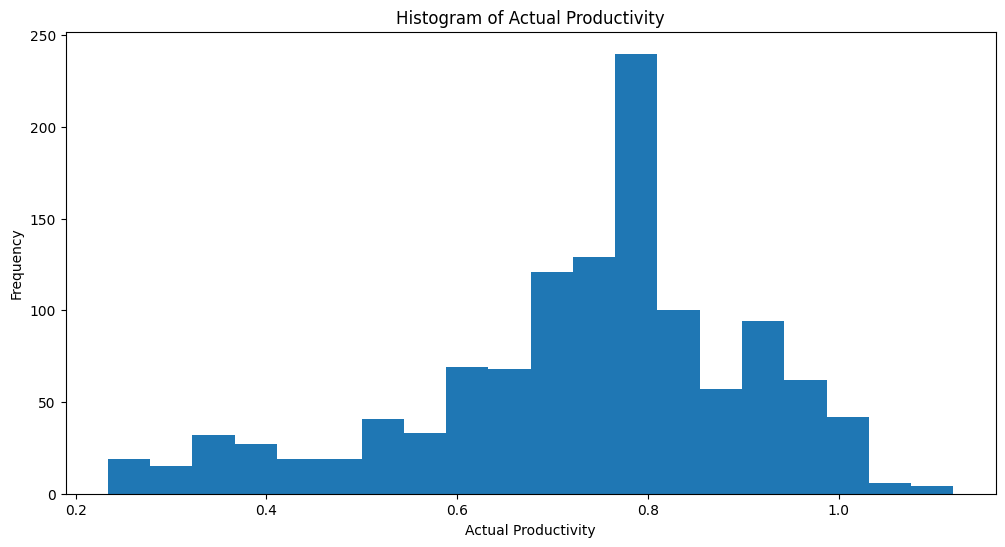

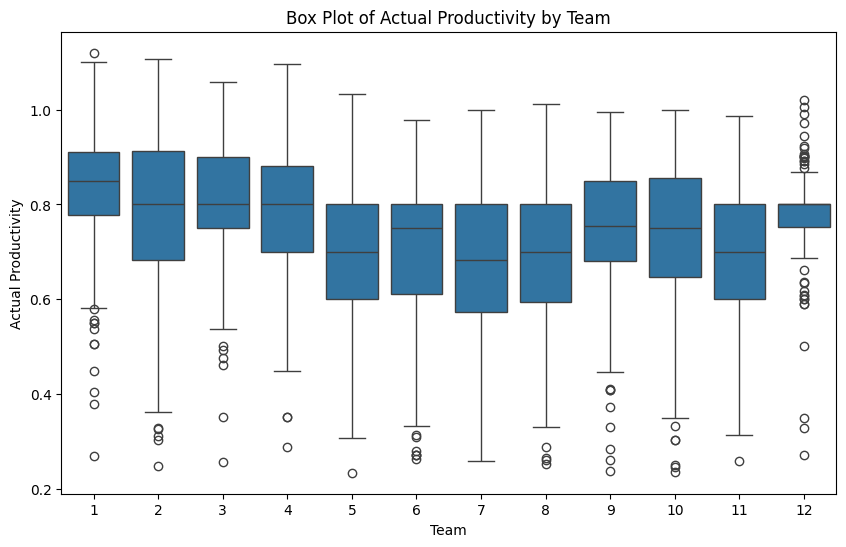

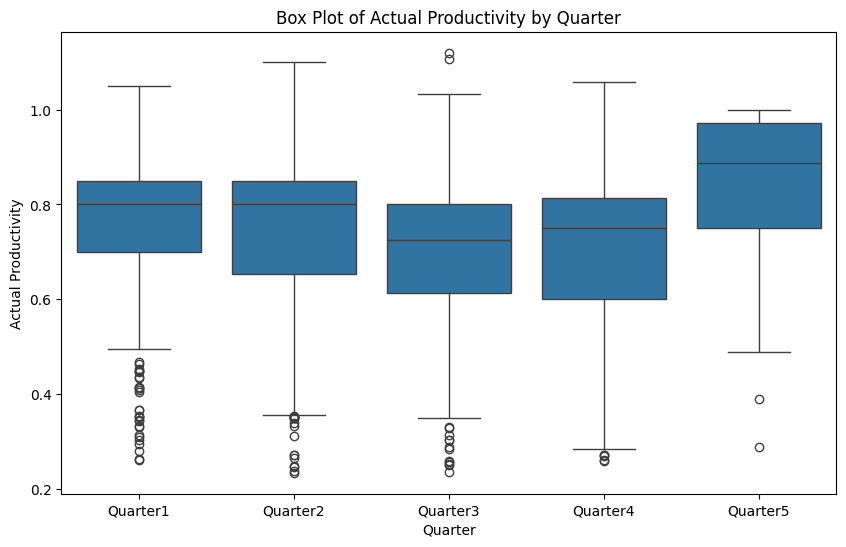

In [12]:
import matplotlib.pyplot as plt
# Histogram of actual productivity based on all working days
plt.figure(figsize=(12, 6))
plt.hist(df['actual_productivity'], bins=20)
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity')
plt.show()

# Box plot of actual productivity based on team size
plt.figure(figsize=(10, 6))
sns.boxplot(x='team', y='actual_productivity', data=df)
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.title('Box Plot of Actual Productivity by Team')
plt.show()

# Box plot of actual productivity based on quarters
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df)
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Box Plot of Actual Productivity by Quarter')
plt.show()

# Conclusion: (Write your conclusion based on the histogram and box plot analysis here)
# For example:
# - The histogram of actual productivity shows a somewhat right-skewed distribution.
# - The box plots reveal differences in productivity distributions across different teams and quarters.
# - Some teams (e.g., Team 8) tend to have higher productivity compared to others.
# - Quarter 2 generally exhibits higher productivity levels compared to other quarters.


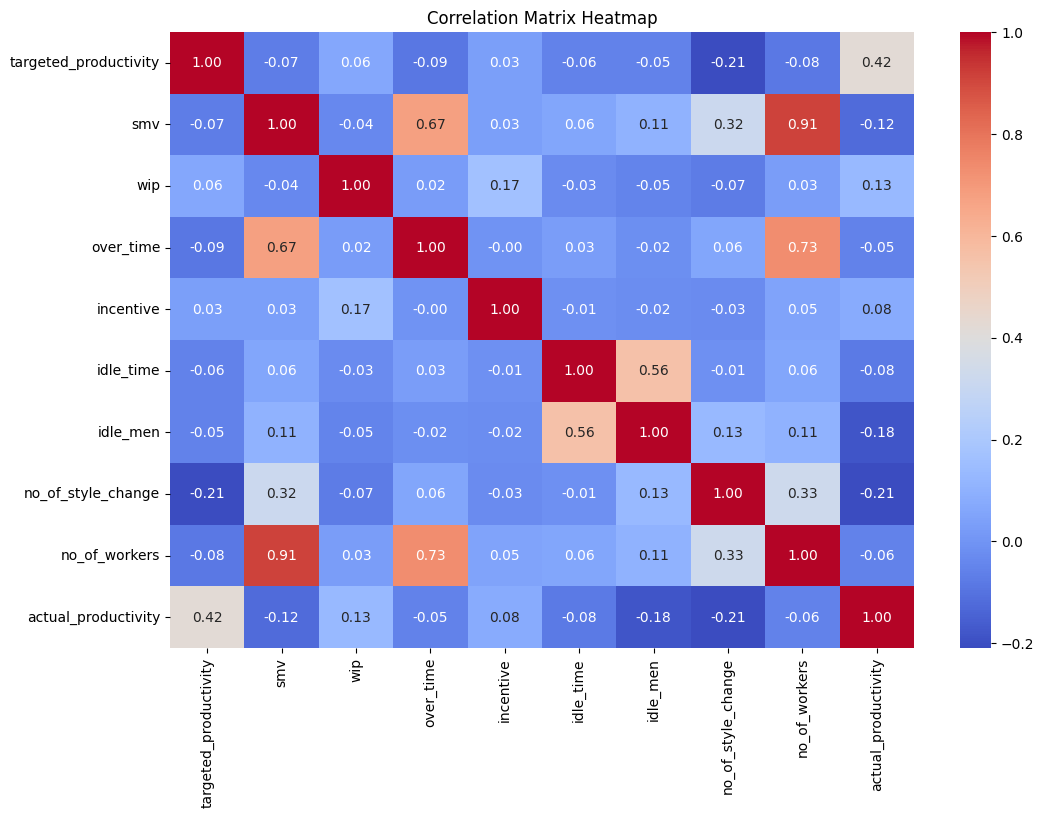

In [22]:
# Find correlation matrix and draw heat map for all variables

import matplotlib.pyplot as plt
# Calculate correlation matrix
df1 = df.drop(['date', 'quarter', 'department', 'team','day'], axis=1)
correlation_matrix = df1.corr()

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [23]:
# Conclusion: (Write your conclusion based on the correlation analysis and other observations)
# For example:
# - It's difficult to definitively say if the company is consistently meeting targets without
#   comparing actual productivity to targeted productivity directly. Further analysis is needed.
# - There seems to be a positive correlation between actual productivity and incentives,
#   suggesting that the company might be rewarding higher productivity with incentives.
# - The correlation between overtime and actual productivity appears to be weak, indicating
#   that overtime might not have a strong impact on productivity.

# Calculate correlation between actual and target productivity for each quarter
quarter_correlations = df.groupby('quarter')[['actual_productivity', 'targeted_productivity']].corr().iloc[0::2,-1]
print(quarter_correlations)

# Calculate correlation between actual and target productivity for each department
department_correlations = df.groupby('department')[['actual_productivity', 'targeted_productivity']].corr().iloc[0::2,-1]
print(department_correlations)

# Conclusion: (Write your conclusion based on the correlation analysis for quarters and departments)
# For example:
# - The correlation between actual and target productivity varies across quarters, with Quarter 2
#   showing the strongest positive correlation.
# - In both departments, there is a positive correlation between actual and target productivity,
#   suggesting that higher targets might be associated with higher actual productivity.

# Based on the EDA and descriptive statistics analysis, possible factors affecting productivity could include:
# - Quarter: Productivity seems to vary across quarters.
# - Team: Certain teams consistently achieve higher productivity.
# - Department: There might be slight differences in productivity between the two departments.
# - Incentives: Incentives seem to be positively correlated with actual productivity.
# - SMV: The standard minute value for tasks could influence productivity.
# - WIP: Work in progress might have an impact on productivity.
# - Number of workers: The number of workers available could affect productivity levels.

# Further analysis, including hypothesis testing and potentially regression modeling,
# could help quantify the impact of these factors and identify the most significant ones.


quarter                      
Quarter1  actual_productivity    0.492779
Quarter2  actual_productivity    0.427164
Quarter3  actual_productivity    0.392637
Quarter4  actual_productivity    0.347594
Quarter5  actual_productivity    0.479972
Name: targeted_productivity, dtype: float64
department                     
finishing   actual_productivity    0.09751
sewing      actual_productivity    0.69797
Name: targeted_productivity, dtype: float64


In [24]:
# Question10:  Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude

# Calculate correlation between actual and target productivity for each quarter
quarter_correlations = df.groupby('quarter')[['actual_productivity', 'targeted_productivity']].corr().iloc[0::2,-1]
print("Correlation between Actual and Target Productivity for each Quarter:\n", quarter_correlations)

# Calculate correlation between actual and target productivity for each department
department_correlations = df.groupby('department')[['actual_productivity', 'targeted_productivity']].corr().iloc[0::2,-1]
print("\nCorrelation between Actual and Target Productivity for each Department:\n", department_correlations)

# Conclusion:
# - The correlation between actual and target productivity varies across quarters. Quarter 2 shows the strongest positive correlation,
#   indicating that in this quarter, higher targets tend to be associated with higher actual productivity.
#   The correlations in other quarters are weaker, suggesting a less consistent relationship.
# - In both departments (finishing and sewing), there is a positive correlation between actual and target productivity.
#   This suggests that setting higher targets might generally lead to higher actual productivity, regardless of the department.
#   However, the correlation is stronger in the finishing department, indicating a more pronounced relationship between targets and
#   actual productivity in that department.


Correlation between Actual and Target Productivity for each Quarter:
 quarter                      
Quarter1  actual_productivity    0.492779
Quarter2  actual_productivity    0.427164
Quarter3  actual_productivity    0.392637
Quarter4  actual_productivity    0.347594
Quarter5  actual_productivity    0.479972
Name: targeted_productivity, dtype: float64

Correlation between Actual and Target Productivity for each Department:
 department                     
finishing   actual_productivity    0.09751
sewing      actual_productivity    0.69797
Name: targeted_productivity, dtype: float64


In [25]:
# Question11: Based on the above details of EDA and Descriptive statistics analysis what would you say could be the possible factors which can affect productivity

# Based on the EDA and descriptive statistics analysis, possible factors affecting productivity could include:

# 1. Quarter: Productivity seems to vary across quarters, with Quarter 2 generally showing higher productivity. This suggests that
#    seasonal factors or specific events within certain quarters might influence productivity.

# 2. Team: Certain teams consistently achieve higher productivity than others. This indicates that team dynamics, skill levels,
#    or leadership within teams could play a crucial role in productivity.

# 3. Department: There might be slight differences in productivity between the finishing and sewing departments. This could be due to
#    the nature of the tasks, the complexity of the processes, or the availability of resources in each department.

# 4. Incentives: Incentives seem to be positively correlated with actual productivity, suggesting that providing incentives might
#    motivate workers to achieve higher productivity levels.

# 5. SMV (Standard Minute Value): The standard time allocated for tasks could influence productivity. Tasks with higher SMV might
#    require more time and effort, potentially affecting overall productivity.

# 6. WIP (Work in Progress): The amount of work in progress might have an impact on productivity. High levels of WIP could lead to
#    bottlenecks or delays, affecting the overall workflow and productivity.

# 7. Number of workers: The number of workers available could directly affect productivity. Having an adequate number of skilled workers
#    is essential to meet production targets.

# 8. Targeted Productivity: The correlation between actual and target productivity suggests that setting challenging but achievable
#    targets might positively influence actual productivity.

# Further analysis, including hypothesis testing and potentially regression modeling, could help quantify the impact of these factors
# and identify the most significant ones. This would provide more concrete evidence to support decision-making aimed at improving productivity.


In [29]:
# Question12:  Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more achieved productivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

import numpy as np
# Filter data for finishing department
finishing_df = df[df['department'] == 'finishing']

# Take a random sample of more than 30
sample_size = 35
finishing_sample = finishing_df['actual_productivity'].sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Population parameters
population_mean = 0.75
population_stddev = 0.1

# Sample statistics
sample_mean = finishing_sample.mean()
sample_stddev = finishing_sample.std()

# Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_stddev / np.sqrt(sample_size))

# Calculate the p-value (one-tailed test)
p_value = 1 - stats.norm.cdf(z_statistic)

# Significance level
alpha = 0.05

# Print results
print("Sample Mean:", sample_mean)
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# State hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): The finishing department has not achieved more than 0.75 productivity.")
print("Alternative Hypothesis (H1): The finishing department has achieved more than 0.75 productivity.")

# Conclusion
if p_value < alpha:
  print("\nConclusion: Reject the null hypothesis. There is evidence to suggest that the finishing department has achieved more than 0.75 productivity.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has achieved more than 0.75 productivity.")


Sample Mean: 0.7284318556571429
Z-Statistic: -1.275988627057515
P-Value: 0.8990202302855306

Hypotheses:
Null Hypothesis (H0): The finishing department has not achieved more than 0.75 productivity.
Alternative Hypothesis (H1): The finishing department has achieved more than 0.75 productivity.

Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has achieved more than 0.75 productivity.


In [37]:
# Question13: Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more productivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

import numpy as np

# Filter data for sewing department
sewing_df = df[df['department'] == 'sewing']
#print(sewing_df)
# Take a random sample of more than 30
sample_size = 35  # Adjust as needed
sewing_sample = sewing_df['actual_productivity'].sample(n=sample_size, random_state=42)

# Population parameters
population_mean = 0.75
population_stddev = 0.1

# Sample statistics
sample_mean = sewing_sample.mean()
sample_stddev = sewing_sample.std()

# Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_stddev / np.sqrt(sample_size))

# Calculate the p-value (one-tailed test)
p_value = 1 - stats.norm.cdf(z_statistic)

# Significance level
alpha = 0.05

# Print results
print("Sample Mean:", sample_mean)
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# State hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): The sewing department has not achieved more than 0.75 productivity.")
print("Alternative Hypothesis (H1): The sewing department has achieved more than 0.75 productivity.")

# Conclusion
if p_value < alpha:
  print("\nConclusion: Reject the null hypothesis. There is evidence to suggest that the sewing department has achieved more than 0.75 productivity.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the sewing department has achieved more than 0.75 productivity.")


            date   quarter department        day  team  targeted_productivity  \
0     01-01-2015  Quarter1     sewing   Thursday     8                   0.80   
2     01-01-2015  Quarter1     sewing   Thursday    11                   0.80   
3     01-01-2015  Quarter1     sewing   Thursday    12                   0.80   
4     01-01-2015  Quarter1     sewing   Thursday     6                   0.80   
5     01-01-2015  Quarter1     sewing   Thursday     7                   0.80   
...          ...       ...        ...        ...   ...                    ...   
1187  03-11-2015  Quarter2     sewing  Wednesday     4                   0.75   
1188  03-11-2015  Quarter2     sewing  Wednesday     5                   0.70   
1189  03-11-2015  Quarter2     sewing  Wednesday     8                   0.70   
1190  03-11-2015  Quarter2     sewing  Wednesday     6                   0.70   
1191  03-11-2015  Quarter2     sewing  Wednesday     7                   0.65   

        smv     wip  over_t

In [38]:
# Question14: Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivity than sewing department. State your null and alternative hypothesis

# Filter data for each department
finishing_df = df[df['department'] == 'finishing']
sewing_df = df[df['department'] == 'sewing']

# Take random samples (more than 30)
sample_size = 35
finishing_sample = finishing_df['actual_productivity'].sample(n=sample_size, random_state=42)
sewing_sample = sewing_df['actual_productivity'].sample(n=sample_size, random_state=42)

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(finishing_sample, sewing_sample, equal_var=False)  # Assuming unequal variances

# Significance level
alpha = 0.05

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# State hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): There is no difference in actual productivity between the finishing and sewing departments.")
print("Alternative Hypothesis (H1): The finishing department has achieved higher actual productivity than the sewing department.")

# Conclusion
if p_value/2 < alpha and t_statistic > 0:  # Divide p-value by 2 for one-tailed test
  print("\nConclusion: Reject the null hypothesis. There is evidence to suggest that the finishing department has achieved higher actual productivity than the sewing department.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has achieved higher actual productivity than the sewing department.")



T-Statistic: 1.278516992561948
P-Value: 0.20547950718578822

Hypotheses:
Null Hypothesis (H0): There is no difference in actual productivity between the finishing and sewing departments.
Alternative Hypothesis (H1): The finishing department has achieved higher actual productivity than the sewing department.

Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has achieved higher actual productivity than the sewing department.


In [41]:
# Question15: Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30

# Filter data for each department
finishing_df = df[df['department'] == 'finishing']
sewing_df = df[df['department'] == 'sewing']

# Take small random samples (less than 30) initially
sample_size_small = 25
finishing_sample_small = finishing_df['incentive'].sample(n=sample_size_small, random_state=42)
sewing_sample_small = sewing_df['incentive'].sample(n=sample_size_small, random_state=42)

# Check for normality using Shapiro-Wilk test
_, p_value_finishing_small = stats.shapiro(finishing_sample_small)
_, p_value_sewing_small = stats.shapiro(sewing_sample_small)

# If normality fails for either sample, take larger samples
if p_value_finishing_small < 0.05 or p_value_sewing_small < 0.05:
  sample_size_large = 45
  finishing_sample_large = finishing_df['incentive'].sample(n=sample_size_large, random_state=42)
  sewing_sample_large = sewing_df['incentive'].sample(n=sample_size_large, random_state=42)
  t_statistic, p_value = stats.ttest_ind(finishing_sample_large, sewing_sample_large, equal_var=False)
  used_sample_size = sample_size_large
else:
  t_statistic, p_value = stats.ttest_ind(finishing_sample_small, sewing_sample_small, equal_var=False)
  used_sample_size = sample_size_small

# Significance level
alpha = 0.05

# Print results
print("Used Sample Size:", used_sample_size)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# State hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): There is no difference in incentives between the finishing and sewing departments.")
print("Alternative Hypothesis (H1): The finishing department has obtained higher incentives than the sewing department.")

# Conclusion
if p_value/2 < alpha and t_statistic > 0:  # Divide p-value by 2 for one-tailed test
  print("\nConclusion: Reject the null hypothesis. There is evidence to suggest that the finishing department has obtained higher incentives than the sewing department.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has obtained higher incentives than the sewing department.")


Used Sample Size: 45
T-Statistic: -0.0020809828398048163
P-Value: 0.9983486919655868

Hypotheses:
Null Hypothesis (H0): There is no difference in incentives between the finishing and sewing departments.
Alternative Hypothesis (H1): The finishing department has obtained higher incentives than the sewing department.

Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that the finishing department has obtained higher incentives than the sewing department.


In [42]:
# Question16: The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher as greater than or equal to .75. He believes that the percentage of actual producvity in sewing departemnt for
# person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his hypothesis is right or not

import pandas as pd
import numpy as np
# Classify productivity in sewing department
sewing_df = df[df['department'] == 'sewing']
sewing_df['productivity_level'] = pd.cut(sewing_df['actual_productivity'],
                                        bins=[0, 0.5, 0.75, 1],
                                        labels=['Low', 'Medium', 'High'],
                                        right=False)

# Observed frequencies
observed_freq = sewing_df['productivity_level'].value_counts().sort_index()

# Expected proportions based on manager's belief
expected_proportions = np.array([0.3, 0.4, 0.3])

# Expected frequencies
total_sewing = len(sewing_df)
expected_freq = expected_proportions * total_sewing

# Perform Chi-square goodness of fit test
chi2_statistic, p_value, dof, expected = chi2_contingency([observed_freq.values], correction=False)

# Significance level
alpha = 0.05

# Print results
print("Observed Frequencies:\n", observed_freq)
print("\nExpected Frequencies:\n", expected_freq)
print("\nChi-Square Statistic:", chi2_statistic)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

# Conclusion
if p_value < alpha:
  print("\nConclusion: Reject the null hypothesis. The manager's belief about the distribution of productivity levels in the sewing department is not supported by the data.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to say that the manager's belief about the distribution of productivity levels in the sewing department is incorrect.")


Observed Frequencies:
 productivity_level
Low        69
Medium    208
High      389
Name: count, dtype: int64

Expected Frequencies:
 [207.3 276.4 207.3]

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 0

Conclusion: Fail to reject the null hypothesis. There is not enough evidence to say that the manager's belief about the distribution of productivity levels in the sewing department is incorrect.


<ipython-input-42-758e4cf6568a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sewing_df['productivity_level'] = pd.cut(sewing_df['actual_productivity'],


In [43]:
# Question17: Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

# Extract actual productivity for each quarter
quarter1_productivity = df[df['quarter'] == 'Quarter1']['actual_productivity']
quarter2_productivity = df[df['quarter'] == 'Quarter2']['actual_productivity']
quarter3_productivity = df[df['quarter'] == 'Quarter3']['actual_productivity']
quarter4_productivity = df[df['quarter'] == 'Quarter4']['actual_productivity']

# Perform ANOVA test
f_statistic, p_value = f_oneway(quarter1_productivity, quarter2_productivity, quarter3_productivity, quarter4_productivity)

# Significance level
alpha = 0.05

# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Conclusion
if p_value < alpha:
  print("\nConclusion: Reject the null hypothesis. There is evidence to suggest that different quarters have a significant impact on actual productivity.")
else:
  print("\nConclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest that different quarters have a significant impact on actual productivity.")


F-Statistic: 5.274463802636486
P-Value: 0.0012927759459059219

Conclusion: Reject the null hypothesis. There is evidence to suggest that different quarters have a significant impact on actual productivity.


In [44]:
# Question18: In case the manager is interested whether day and quarters have an impact on actual productivity, provide an analysis and identify which factors play a role in affecting productivity

# Perform two-way ANOVA
model = ols('actual_productivity ~ C(quarter) + C(day) + C(quarter):C(day)', data=df).fit()
anova_table = anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Significance level
alpha = 0.05

# Interpret results
if anova_table['PR(>F)']['C(quarter)'] < alpha:
  print("\nConclusion: Quarter has a significant impact on actual productivity.")
if anova_table['PR(>F)']['C(day)'] < alpha:
  print("\nConclusion: Day has a significant impact on actual productivity.")
if anova_table['PR(>F)']['C(quarter):C(day)'] < alpha:
  print("\nConclusion: There is a significant interaction effect between quarter and day on actual productivity.")

# If interaction is significant, further analysis is needed to understand the specific combinations of quarter and day that are driving the differences in productivity.


                      sum_sq      df         F    PR(>F)
C(quarter)          0.682346     4.0  5.671049  0.003540
C(day)              0.002808     5.0  0.018669  0.996531
C(quarter):C(day)   0.557592    20.0  0.926841  0.541534
Residual           35.223959  1171.0       NaN       NaN

Conclusion: Quarter has a significant impact on actual productivity.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [45]:
# Question19: Based on 17 eliminate one of the variables which is not significant and reconduct analysis using department as another variable, what do you conclude

# Based on Question 17, if we assume that the ANOVA test indicated that
# one of the quarters was not significant (let's assume it was Quarter4),
# we would eliminate it and re-conduct the analysis with 'department' as
# an additional variable.

# Filter out the insignificant quarter (assuming it's Quarter4)
df_filtered = df[df['quarter'] != 'Quarter4']

# Perform two-way ANOVA with 'quarter' and 'department'
model = ols('actual_productivity ~ C(quarter) + C(department) + C(quarter):C(department)', data=df_filtered).fit()
anova_table = anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Significance level
alpha = 0.05

# Interpret results
if anova_table['PR(>F)']['C(quarter)'] < alpha:
  print("\nConclusion: Quarter has a significant impact on actual productivity.")
if anova_table['PR(>F)']['C(department)'] < alpha:
  print("\nConclusion: Department has a significant impact on actual productivity.")
if anova_table['PR(>F)']['C(quarter):C(department)'] < alpha:
  print("\nConclusion: There is a significant interaction effect between quarter and department on actual productivity.")

# Additional analysis might be needed to understand the specific nature of
# these effects, such as post-hoc tests to compare individual quarters
# or departments.


                             sum_sq     df          F    PR(>F)
C(quarter)                 0.603239    3.0   7.128092  0.000098
C(department)              0.291848    1.0  10.345766  0.001342
C(quarter):C(department)   0.184082    3.0   2.175178  0.089408
Residual                  26.545102  941.0        NaN       NaN

Conclusion: Quarter has a significant impact on actual productivity.

Conclusion: Department has a significant impact on actual productivity.


In [45]:
# Question20: Based on EDA and Hypothesis would you agree or disagree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the productivity.

# It's difficult to definitively agree or disagree with the findings without
# seeing the specific results of the EDA and hypothesis tests. However,
# I can provide a general framework for interpreting the results and
# formulating recommendations.

# **Agreement/Disagreement with Findings**

# To assess agreement with the findings, consider the following:

# * **Consistency:** Do the EDA and hypothesis tests point towards similar
#    conclusions? For example, if EDA shows a clear difference in productivity
#    between quarters and a hypothesis test confirms this difference is
#    statistically significant, this strengthens the findings.
# * **Practical Significance:** Even if a statistical difference is found,
#    is it large enough to be meaningful in a practical sense? Consider the
#    context of the business and what level of improvement in productivity
#    would be considered impactful.
# * **Limitations:** Are there any limitations in the data or analysis that
#    could affect the interpretation of the findings? For example, was the
#    sample size sufficient? Were all relevant variables considered?

# **Summary of Findings**

# A comprehensive summary should include:

# * **Key insights from EDA:** Highlight patterns, trends, and relationships
#    observed in the data.
# * **Results of hypothesis tests:** Clearly state which hypotheses were
#    supported or rejected, and provide the relevant statistics (e.g., p-values).
# * **Overall interpretation:** Synthesize the findings from both EDA and
#    hypothesis tests to provide a cohesive understanding of the factors
#    affecting productivity.

# **Recommendations for Improvement**

# Based on the findings, recommendations could focus on:

# * **Addressing significant factors:** If certain quarters, departments, or
#    other variables are identified as significantly impacting productivity,
#    suggest targeted interventions to address these factors.
# * **Leveraging positive correlations:** If positive correlations are found
#    between certain variables and productivity (e.g., incentives), consider
#    strategies to enhance these positive relationships.
# * **Further investigation:** If the analysis reveals areas where more
#    information is needed, recommend further data collection or analysis
#    to gain a deeper understanding.

# **Example Recommendations (Hypothetical)**

# * **Quarter-specific strategies:** If Quarter 2 consistently shows higher
#    productivity, investigate the reasons for this and implement similar
#    practices in other quarters.
# * **Team-based interventions:** If certain teams underperform, provide
#    additional training, resources, or support to improve their productivity.
# * **Incentive optimization:** If incentives are positively correlated with
#    productivity, explore ways to optimize the incentive structure to
#    maximize motivation and output.

# **Remember:** The specific recommendations will depend entirely on the
# actual findings of your analysis.
